In [3]:
import numpy as np
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets

from pykeops.torch import LazyTensor

import time
import matplotlib.pyplot as plt

from os import mkdir
from os.path import isdir

from itertools import cycle
# if torch.cuda.is_available():
#     device = torch.device('cuda')
#     dtype = torch.cuda.FloatTensor
# else:
#     device = torch.device('cpu')
#     dtype = torch.FloatTensor
# device = torch.device('cpu')
# print(device)

normalize_cost = True

lines = ("-",(0, (5, 5)),"--","-.",":")

fol = 'plots/'
if not isdir(fol):
    mkdir(fol)

# Curves w.r.t. $\lambda$

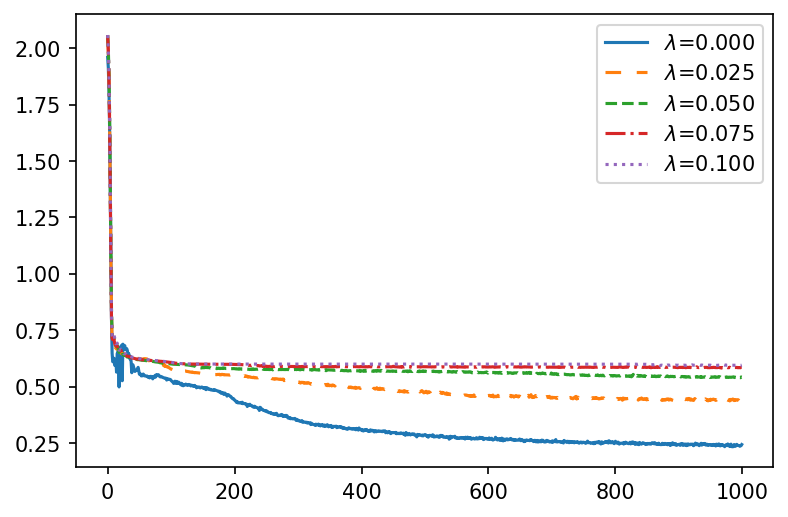

In [20]:

CONV_GEN = 'MLP'
METHOD,lrpsi = 'SDOT', '5'
#METHOD,lrpsi = 'SDOTNN', '0.1'
batch_size = 'None'

fol = 'plots/'
if not isdir(fol):
    mkdir(fol)

lmblist = ['0.000','0.025','0.050','0.075','0.100']
n = len(lmblist)

linecycler = cycle(lines)

losslist = []
plt.figure(dpi=150)
for i in range(n):
    lmb = lmblist[i]
    loss = torch.load('mnist_uniform/loss_'+METHOD+'_lmb='+lmb+'_lrpsi='+lrpsi+'_'+CONV_GEN+'_batch'+batch_size+'.pth')
    losslist.append(loss)
    plt.plot(loss[0:1000],linestyle=lines[i],label='$\lambda$='+lmb)
plt.legend(loc=1,fontsize=10)
plt.savefig(fol+'mnist_losses_wrtlambda_'+METHOD+'_'+CONV_GEN+'_batch'+batch_size+'.pdf')
plt.show()

# NN parameterization or not

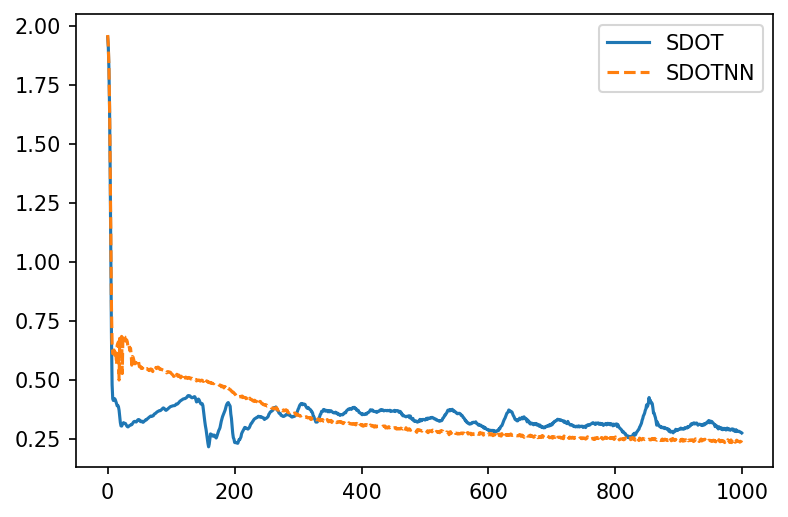

In [35]:

CONV_GEN = 'DCGAN'

losslist = []
plt.figure(dpi=150)

lmb = '0.000'
METHOD,lrpsi,batch_size = 'SDOT', '5', 'None'
loss = torch.load('mnist_uniform/loss_'+METHOD+'_lmb='+lmb+'_lrpsi='+lrpsi+'_'+CONV_GEN+'_batch'+batch_size+'.pth')
plt.plot(loss[0:1000],label='SDOT')
METHOD,lrpsi,batch_size = 'SDOTNN', '0.1', 'None'
loss = torch.load('mnist_uniform/loss_'+METHOD+'_lmb='+lmb+'_lrpsi='+lrpsi+'_'+CONV_GEN+'_batch'+batch_size+'.pth')
plt.plot(loss[0:1000],linestyle="--",label='SDOTNN')

plt.legend(loc=1,fontsize=10)
plt.savefig(fol+'mnist_losses_wrtparam_'+CONV_GEN+'_lmb='+lmb+'.pdf')
plt.show()

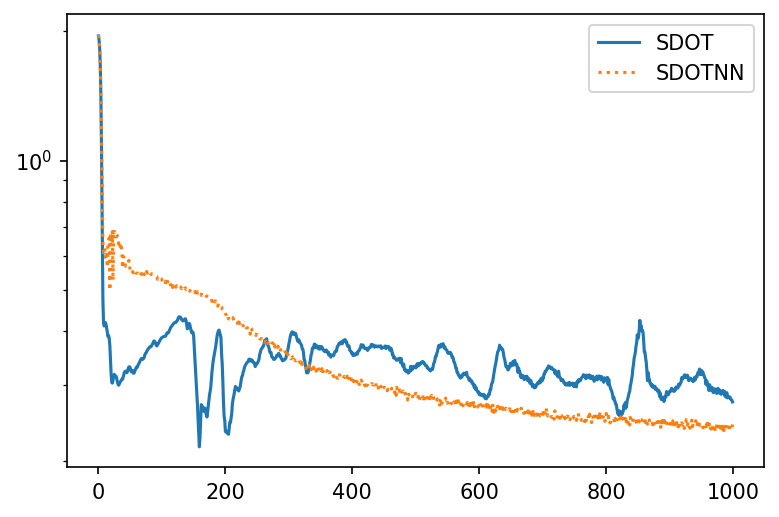

In [47]:

CONV_GEN = 'MLP'

losslist = []
plt.figure(dpi=150)

lmb = '0.000'
METHOD,lrpsi,batch_size = 'SDOT', '5', 'None'
loss = torch.load('mnist_uniform/loss_'+METHOD+'_lmb='+lmb+'_lrpsi='+lrpsi+'_'+CONV_GEN+'_batch'+batch_size+'.pth')
plt.semilogy(loss[0:1000],label='SDOT')
METHOD,lrpsi,batch_size = 'SDOTNN', '0.1', 'None'
loss = torch.load('mnist_uniform/loss_'+METHOD+'_lmb='+lmb+'_lrpsi='+lrpsi+'_'+CONV_GEN+'_batch'+batch_size+'.pth')
plt.semilogy(loss[0:1000],':',label='SDOTNN')

plt.legend(loc=1,fontsize=10)
plt.savefig(fol+'mnist_losses_wrtparam_'+CONV_GEN+'_lmb='+lmb+'.pdf')
plt.show()

# Plots w.r.t. to batch size

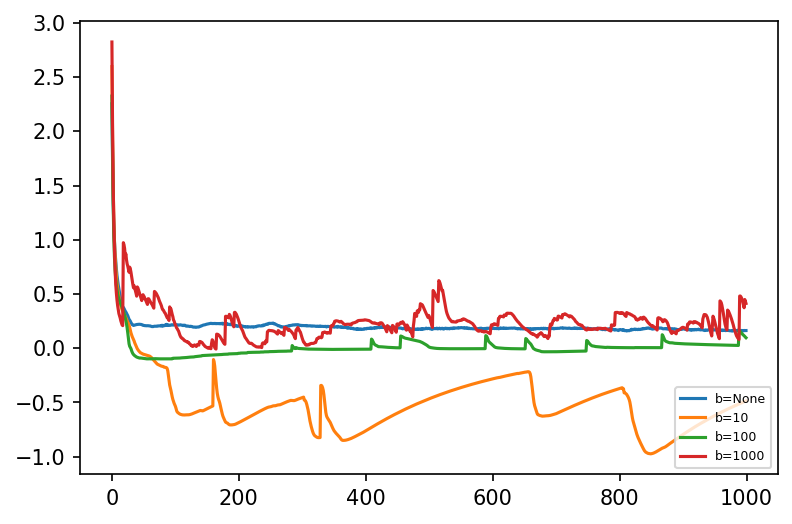

In [83]:

CONV_GEN = 'DCGAN'
METHOD,lrpsi = 'SDOT', '5'
#METHOD,lrpsi = 'SDOTNN', '0.1'
lmb = '0.025'

fol = 'plots/'
if not isdir(fol):
    mkdir(fol)

blist = ['None','10','100','1000']
n = len(blist)

losslist = []
plt.figure(dpi=150)
for i in range(n):
    batch_size = blist[i]
    loss = torch.load('mnist_uniform/loss_'+METHOD+'_lmb='+lmb+'_lrpsi='+lrpsi+'_'+CONV_GEN+'_batch'+batch_size+'.pth')
    losslist.append(loss)
    plt.plot(loss[0:1000],label='b='+batch_size)
plt.legend(loc=4,fontsize=6)
plt.savefig(fol+'mnist_losses_wrtbatch_'+METHOD+'_'+CONV_GEN+'_lmb='+lmb+'.pdf')
plt.show()